In [1]:
!wget http://vis-www.cs.umass.edu/lfw/people.txt
!wget http://vis-www.cs.umass.edu/lfw/pairs.txt
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

--2017-05-28 14:13:39--  http://vis-www.cs.umass.edu/lfw/people.txt
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94770 (93K) [text/plain]
Saving to: ‘people.txt’

people.txt          100%[===================>]  92,55K   254KB/s    in 0,4s    

2017-05-28 14:13:40 (254 KB/s) - ‘people.txt’ saved [94770/94770]

--2017-05-28 14:13:40--  http://vis-www.cs.umass.edu/lfw/pairs.txt
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155335 (152K) [text/plain]
Saving to: ‘pairs.txt’

pairs.txt           100%[===================>] 151,69K   398KB/s    in 0,4s    

2017-05-28 14:13:41 (398 KB/s) - ‘pairs.txt’ saved [155335/155335]

--2017-05-28 14:13:41--  http:/

In [1]:
import numpy as np
import cv2

In [2]:
with open('people.txt') as f:
    s = f.read().split('\n')
n = int(s[0])
s = s[1:]
s = iter(s) #behaves like a file object
k = 0
X_train, y_train = [], []
X_test, y_test = [], []
# names = dict()
for i in range(n):
    set_num = int(next(s))
    print(set_num)
    for line in range(set_num):
        name, idx = next(s).split('\t')
#         names[name] = k
        for j in range(1, int(idx) + 1):
            file_name = 'lfw/%s/%s_%s.jpg' % (name, name, str(j).zfill(4))
            img = cv2.imread(file_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (160, 160)).reshape(1, 160, 160)
            if i < n - 1:
                X_train.append(img)
                y_train.append(k)
            else:
                X_test.append(img)
                y_test.append(k)
        k += 1

601
555
552
560
567
527
597
601
580
609


In [4]:
# import cPickle as pickle
# import os
# def write_data(data, filename):
#     filename = os.path.join('./', filename)
#     with open(filename, 'w') as f:
#         pickle.dump(data, f)
# write_data(names, 'datasets/name_dict')

In [3]:
# X_train = np.array(X_train)
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

((11450, 1, 160, 160), (11450,))
((1783, 1, 160, 160), (1783,))
[4639 1091   33  770 3296  575  772 1608 3767 4602]


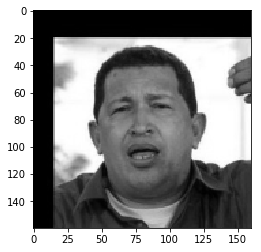

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train[:10])
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[10][0], cmap='gray')

In [6]:
np.savez('data_set160.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)